In [4]:
#%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append("../scripts")
%load_ext autoreload
%autoreload 2
from local_plot import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read poses from topic /SwarmNode1/pose
Trajectory total length  3.399007314451825
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame_predict
Read poses from topic /SwarmNode2/pose
Trajectory total length  3.159322308849649
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame_predict
Yaw Offset,  59.83527599052222 Fused Offset [ 1.07785938 -1.6318404   0.29123396]
RMSE Fused Online 1 is 0.052,0.056,0.063
RMSE Fused Offline Path 1 is 0.116,0.015,0.053
RMSE VO 1 is 0.020,0.020,0.046
RMSE Fused Online 2 is 0.864,0.496,0.024
RMSE Fused Offline Path 2 is 0.751,0.476,0.027
RMSE VO 2 is 0.012,0.015,0.020
RMSE 1->2 0.873,0.484,0.079


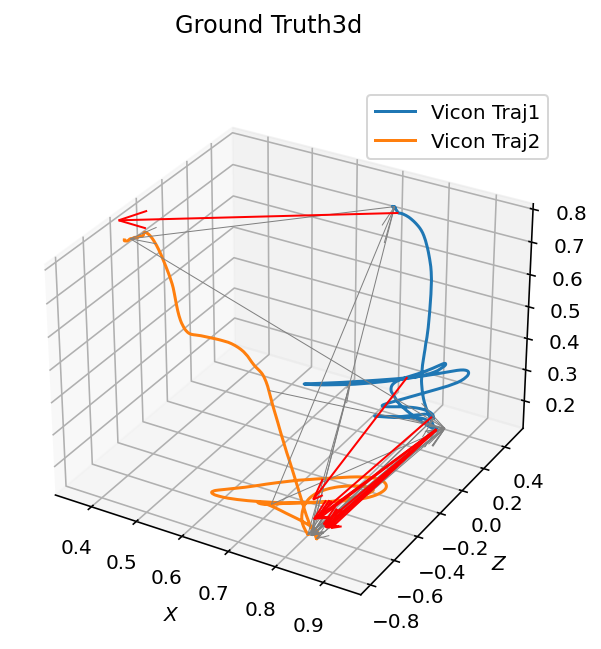

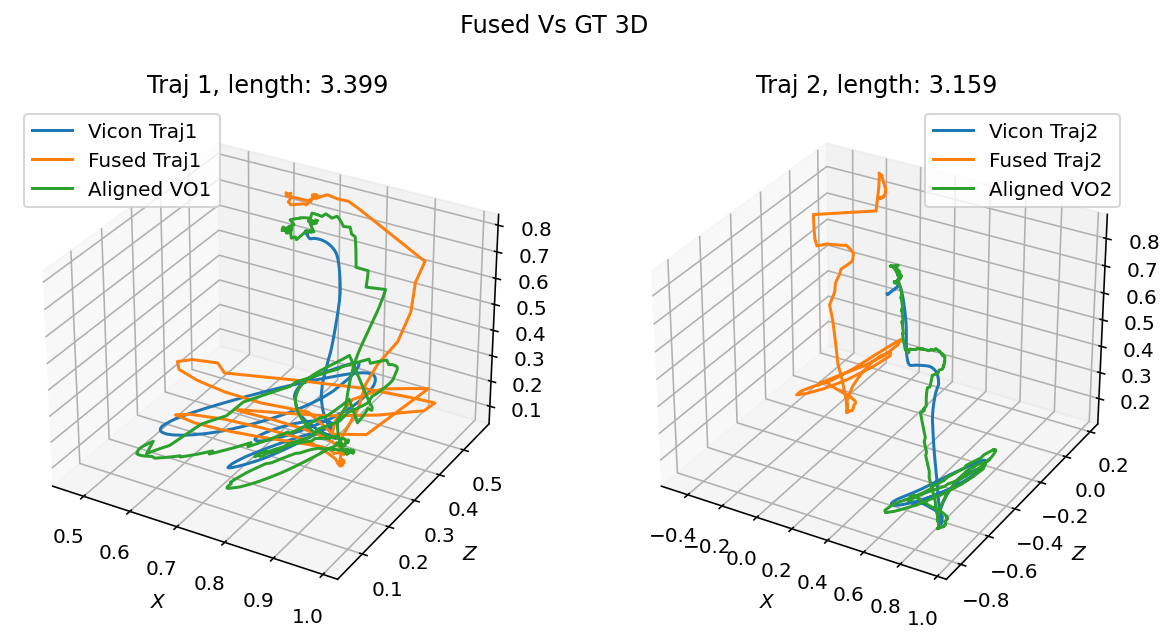

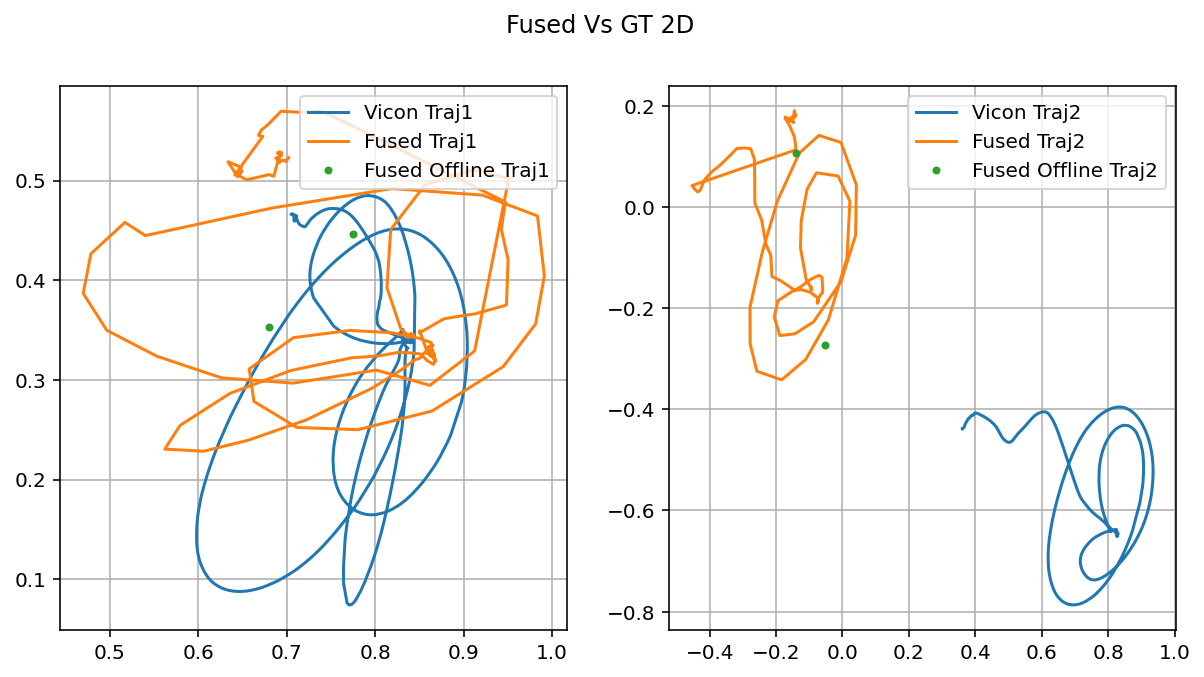

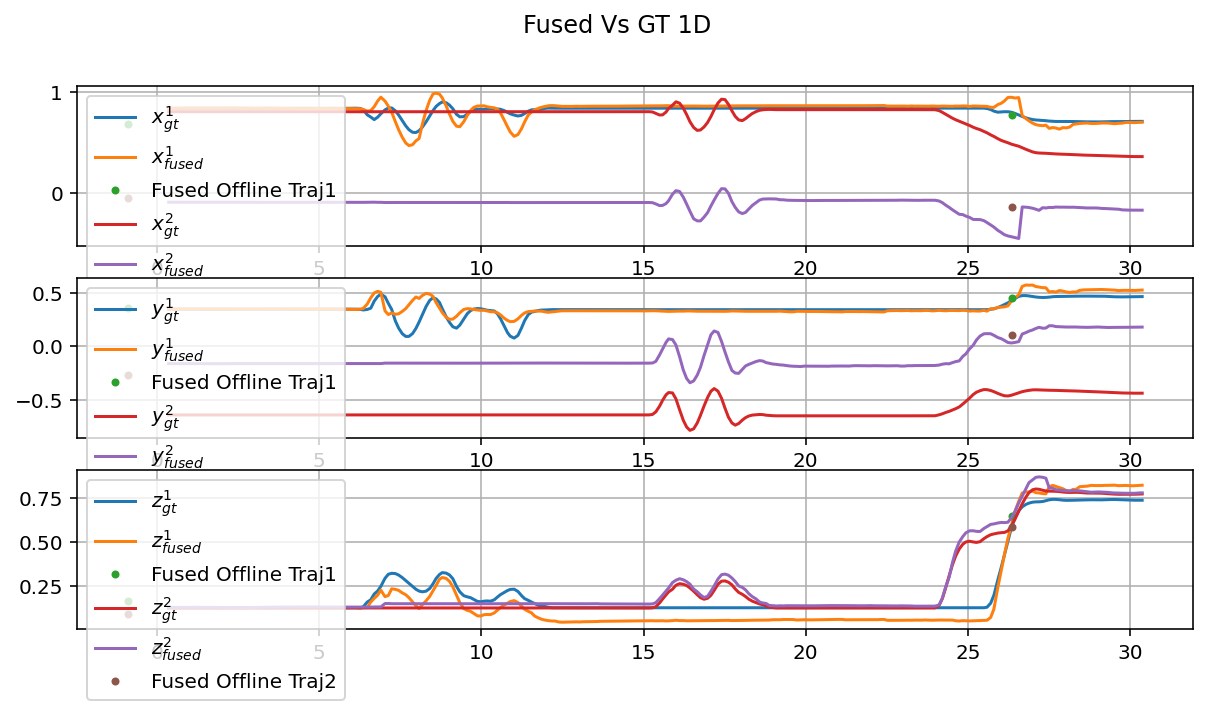

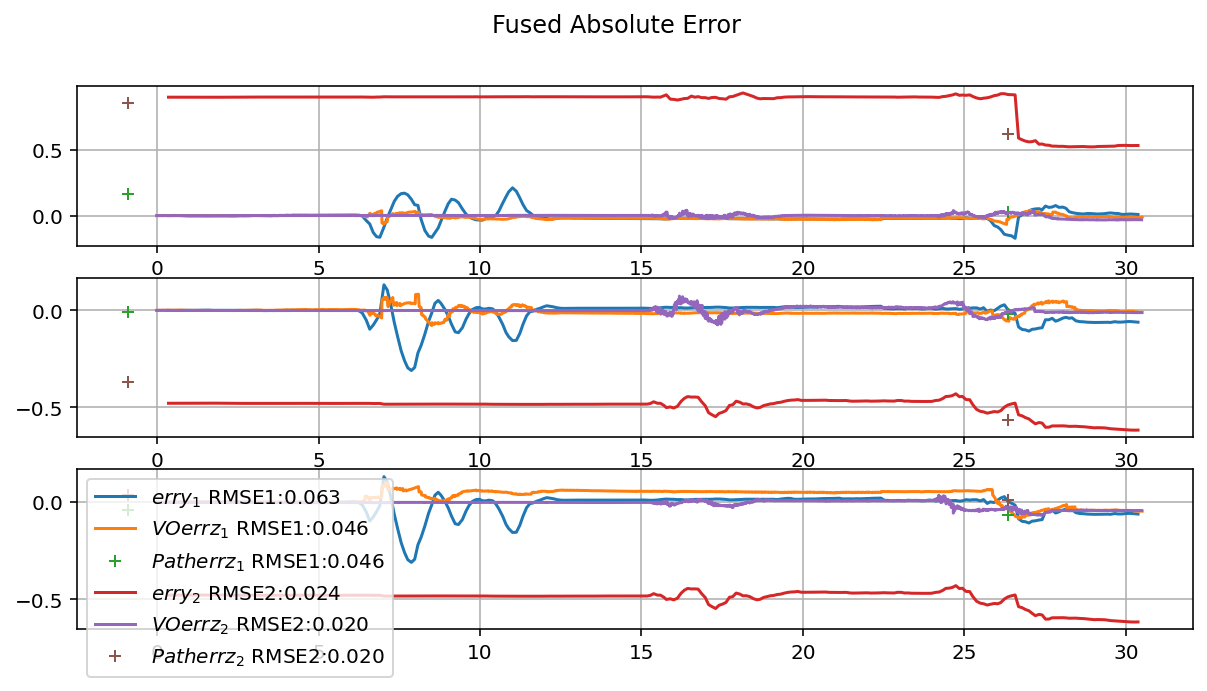

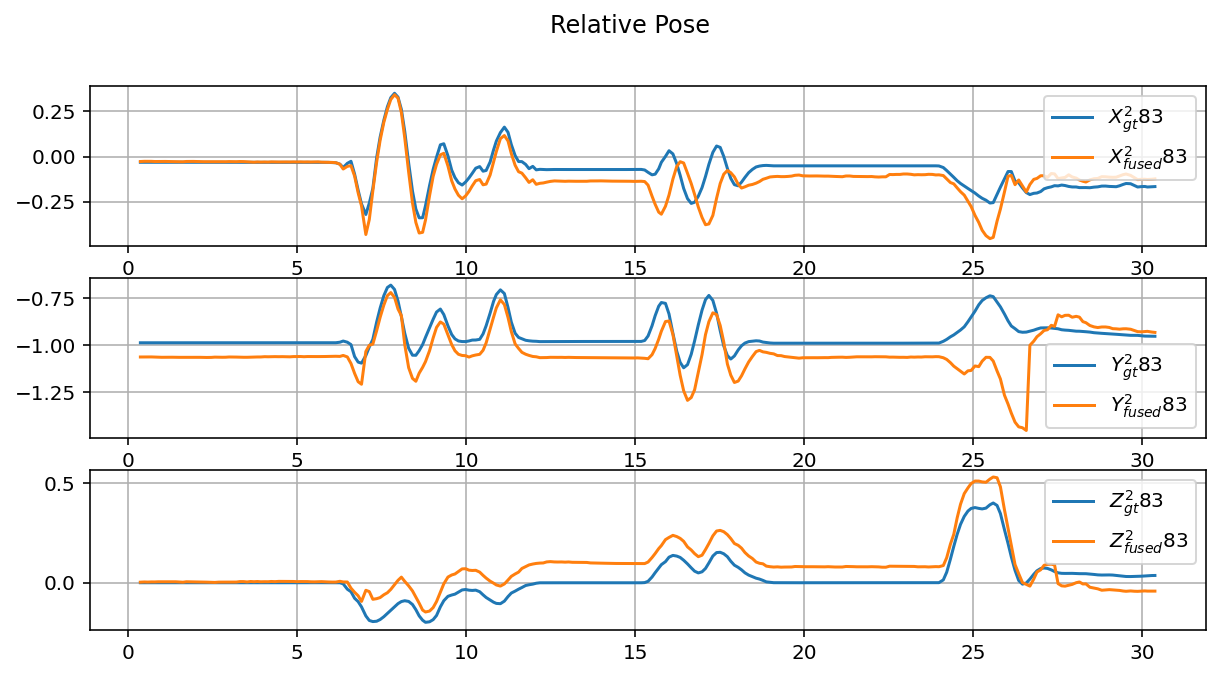

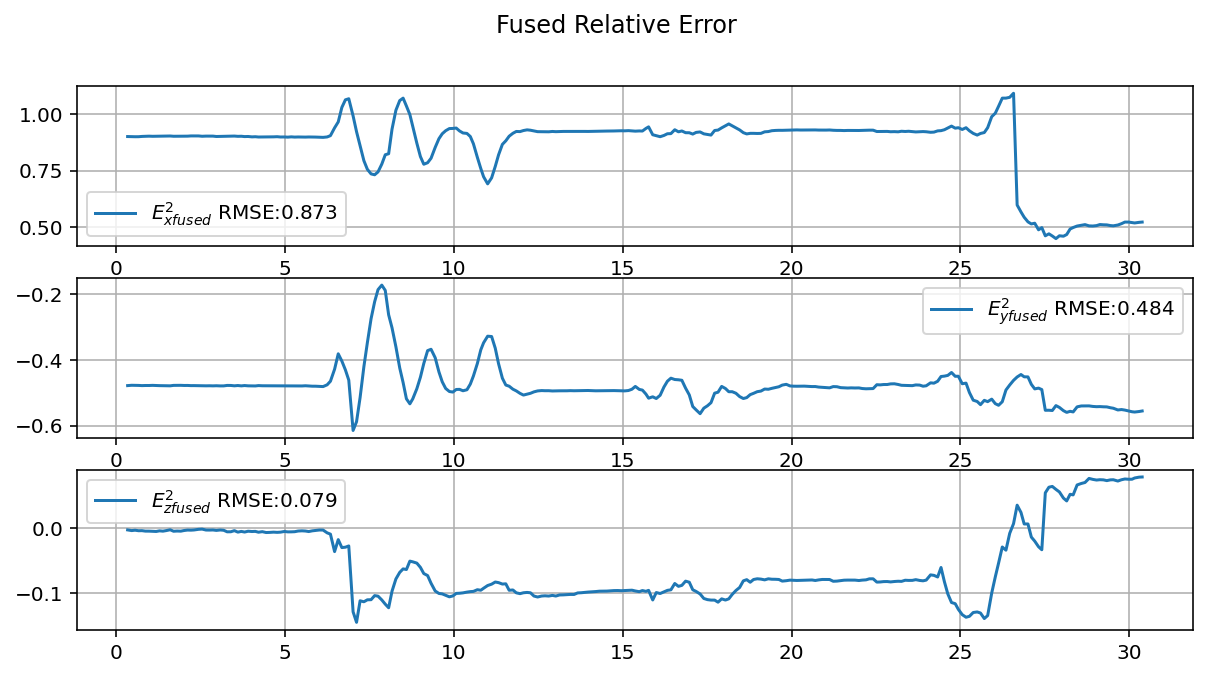

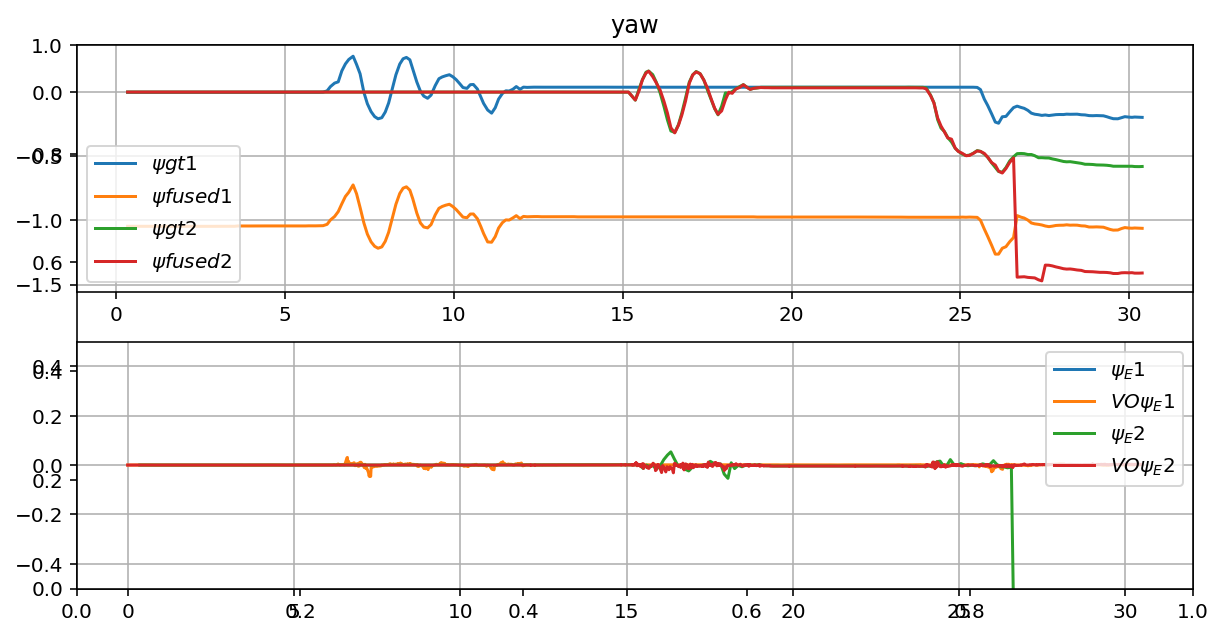

In [69]:
nodes = [1, 2]
#poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_2020-12-10-19-39-05.bag", nodes, False)
#poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_2020-12-10-20-33-29.bag", nodes, False)
poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_pc.bag", nodes, True)

plt.close('all')

plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes)
plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes, 1)
plt.show()

In [ ]:
plot_loops_error(poses, loops, nodes)

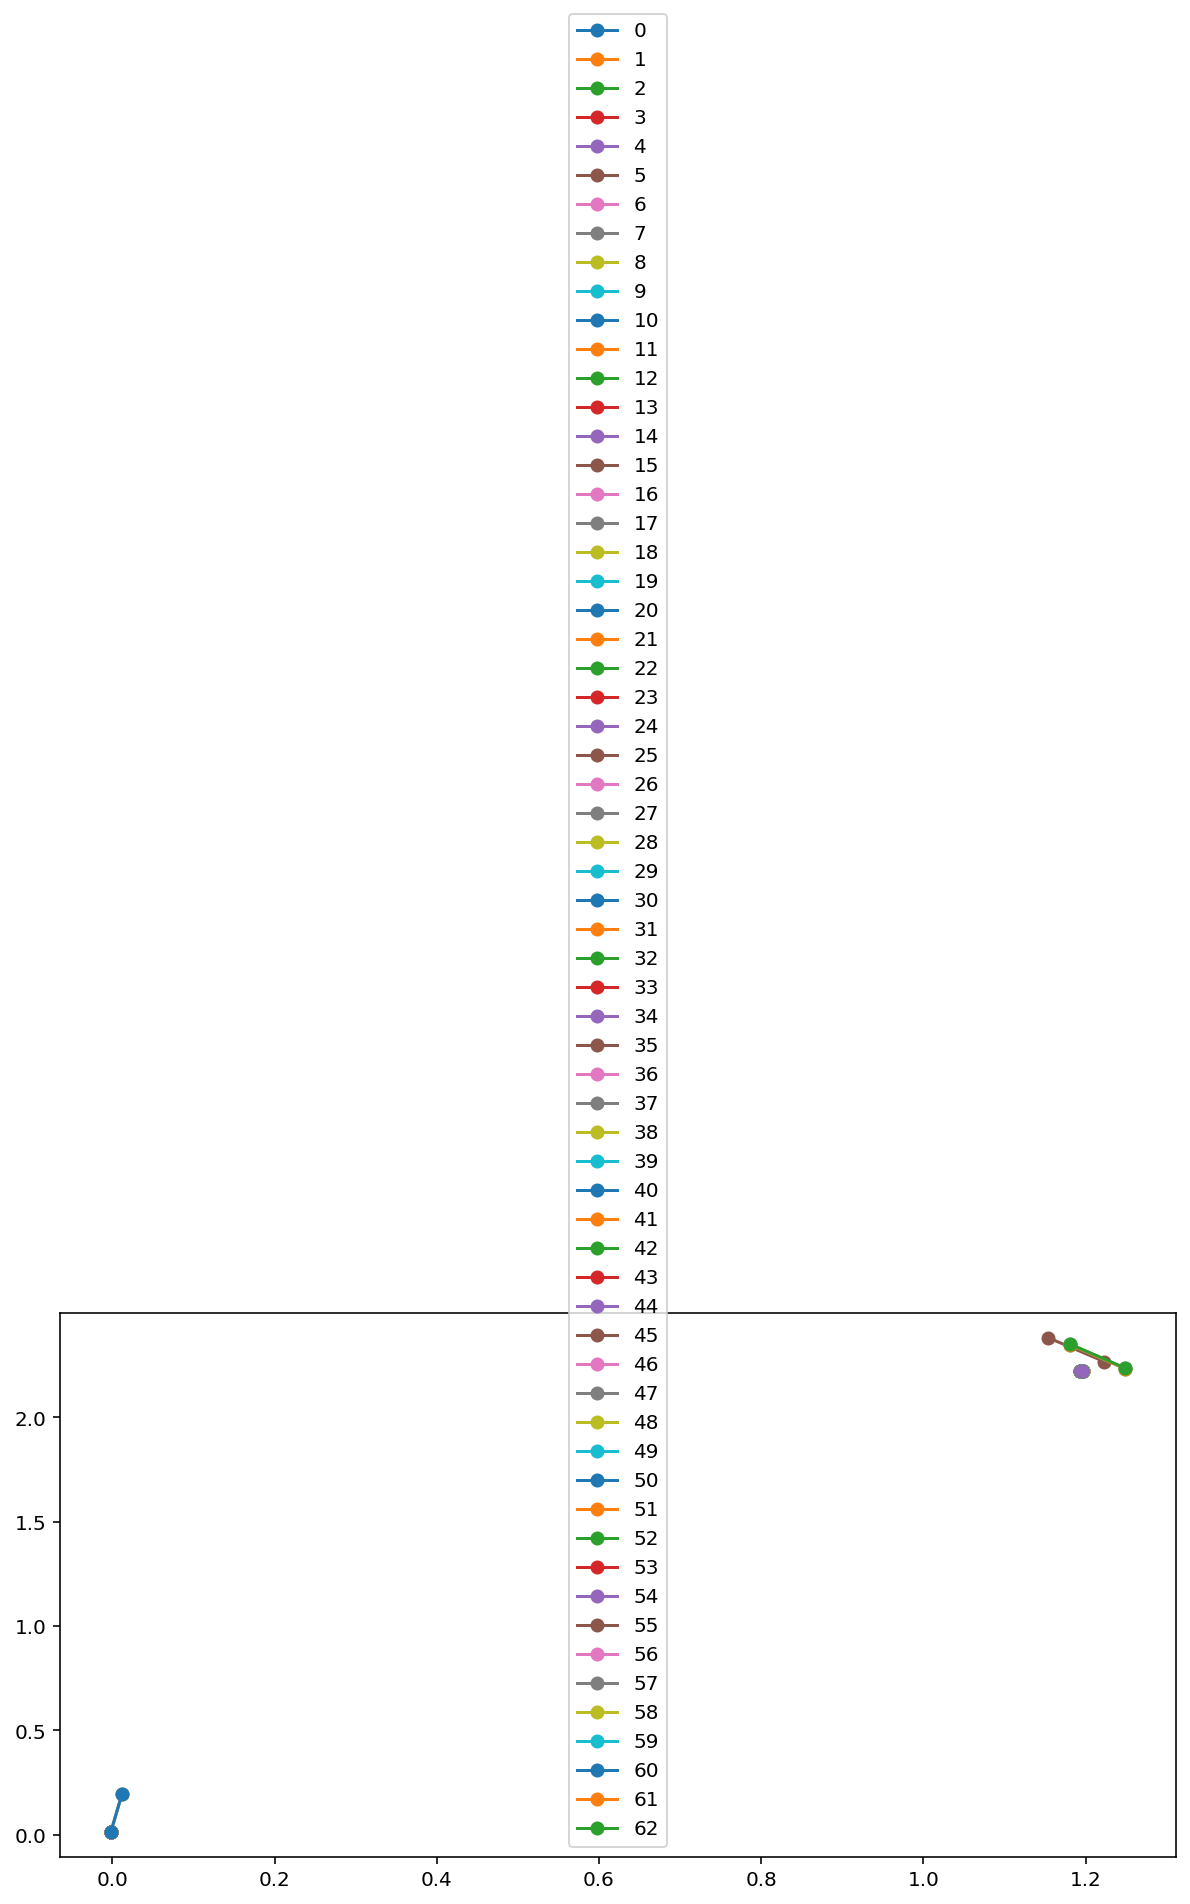

In [70]:
bag = rosbag.Bag("data/swarm_local_pc.bag")
pathes = read_path_all(bag, "/swarm_drones/est_drone_1_path", 0)
fig = plt.figure("Pathes")
#for k in range(508, 510):
for k in range(len(pathes)):
    path = pathes[k]
    #plt.plot(path["pos"][:,0],path["pos"][:,1], label=str(k))
    #plt.plot(path["pos"][0,0],path["pos"][0,1], '-o', label=str(k))
    plt.plot(path["pos"][:,0],path["pos"][:,1], '-o', label=str(k))
plt.legend()
plt.show()

In [60]:
pathes[508: 510]

[{'t': array([1.60760038e+09, 1.60760040e+09, 1.60760041e+09, 1.60760042e+09,
         1.60760043e+09, 1.60760043e+09, 1.60760043e+09]),
  'pos': array([[-0.01960486,  0.07050526,  0.00984638],
         [-0.02799221,  0.20384879,  0.492704  ],
         [-0.03671542, -0.20664387,  0.78614503],
         [ 0.35609385, -0.26964458,  1.09253485],
         [ 0.65951623, -0.67365022,  1.07800366],
         [ 1.13912467, -0.85761116,  1.04523511],
         [ 1.579656  , -1.11057212,  1.04786315]]),
  'ypr': array([[-1.22570069e-04, -0.00000000e+00,  0.00000000e+00],
         [-1.88209488e-01, -0.00000000e+00,  0.00000000e+00],
         [-4.61402856e-01, -0.00000000e+00,  0.00000000e+00],
         [-8.25688620e-01, -0.00000000e+00,  0.00000000e+00],
         [-6.98293288e-01, -0.00000000e+00,  0.00000000e+00],
         [-4.73488857e-01, -0.00000000e+00,  0.00000000e+00],
         [-3.41229160e-01, -0.00000000e+00,  0.00000000e+00]])},
 {'t': array([1.60760037e+09, 1.60760040e+09, 1.60760041e+09